In [1]:
import warnings
warnings.filterwarnings("ignore")
import netCDF4 as nc
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr    
import glob
import os
import cartopy.crs as ccrs
import matplotlib.colors as colors
import pandas as pd
import datetime
from matplotlib import colors
import seaborn as sns
from scipy import stats
from scipy.interpolate import make_interp_spline


HWF_EHF
0.9314796470913096
HWD_EHF
0.9428696444251676
HWT_EHF
0.9432427863995488
HWC
0.9575469631977734


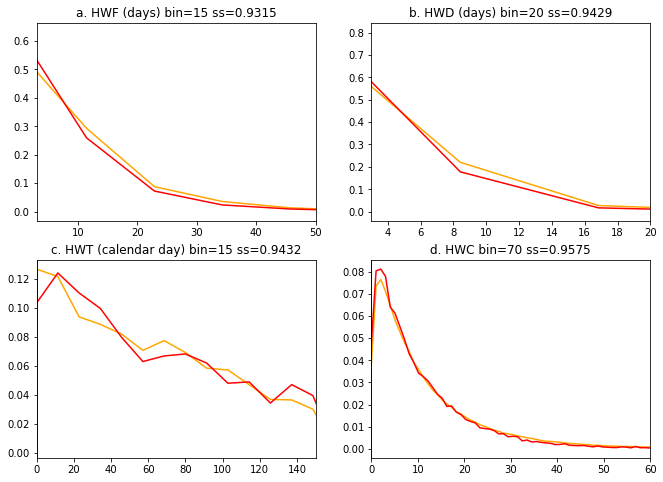

In [4]:
from string import ascii_lowercase

f, axes = plt.subplots(2, 2, figsize=((5.5*2),4*2)) 
HWX_list =["HWF_EHF","HWD_EHF","HWT_EHF"]
HWX_list_2 =["HWF (days)","HWD (days)","HWT (calendar day)"]
numlist=[0,0,1]
numlist2=[0,1,0]
binlist=[15,20,15]
xlimlist_2=[50,20,150]
xminlist_2=[3,3,0]
hislimlist=[50,25,160] 


ax={}



d_filenames = []
d_filenames = sorted(glob.glob("/g/data/w97/sl7808/ALLOUTPUT/EHF_year_ACCESS/by_ensemble/ehf_year_exp*.nc"))   

abc=0

for h,n,nn,b,xx1,xx2,h2 in zip (HWX_list,numlist,numlist2,binlist,xlimlist_2,xminlist_2,HWX_list_2 ):

    #ACCESS
    d_filenames = []
    d_filenames = sorted(glob.glob("/g/data/w97/sl7808/ALLOUTPUT/EHF_year_ACCESS/by_ensemble/ehf_year_exp*.nc"))
    f=[]
    for d in d_filenames:
        a = xr.open_dataset(d, decode_times=False)
        a1 = a[h]
        a2=a1.where(a1>0).isel(time=slice(60,163))
        f.insert(-1,a2)
    ACCESS=xr.concat(f, 'ensemble')
    stack_1=ACCESS.stack({'stacked':['lat','time','lon','ensemble']})
    stack_2=stack_1.dropna(dim='stacked')
        
        
    res_a = stats.relfreq(stack_2, numbins=b,defaultreallimits=(0,xl))

    x = res_a.lowerlimit + np.linspace(0, res_a.binsize*res_a.frequency.size,res_a.frequency.size)
    axes[n,nn].set_xlim([xx2, xx1])
    axes[n,nn].plot(x, res_a.frequency,color='orange')



    
    
    #OBS
    HWX_obs = xr.open_dataset("/g/data/w97/sl7808/ALLOUTPUT/EHF_obs/original/EHF_heatwaves____yearly_summer.nc",decode_times=False)
    HWX=HWX_obs[h]
    HWX_obs_2=HWX.where(HWX>0).isel(time=slice(0,103))
    stack=HWX_obs_2.stack({'stacked':['lat','time','lon']})
    a=stack.dropna(dim='stacked')
    
    res_o = stats.relfreq(a, numbins=b,defaultreallimits=(0,xl))
    x = res_o.lowerlimit + np.linspace(0, res_o.binsize*res_o.frequency.size,res_o.frequency.size)
    axes[n,nn].plot(x, res_o.frequency,color='red')
    

    
    #skill score
    rr = xr.Dataset({
            'rfreq': xr.DataArray(
                    data   = [res_a.frequency,res_o.frequency],
                    dims   = ['source','HWC'],
                    )
                })

    ss= rr.rfreq.min(dim='source').sum()
    
    
    #plot
    ttt=(ascii_lowercase[abc]+". "+h2+" bin="+str(b)+ ' ss='+"{:.4f}".format(ss.values))
    axes[n,nn].set(title=ttt)
    axes[n,nn].axvline(x=0, color='black', linestyle='-')   

    abc=abc+1
    print(h)
    print(ss.values)

#Cumulative heat
b=70
xx1=70



#ACCESS
cum_filenames = []
cum_filenames = sorted(glob.glob("/g/data/w97/sl7808/ALLOUTPUT/Cumheat_ACCESS/*.nc")) 
file_name = []
f=[]
for c in cum_filenames:
    a = xr.open_dataset(c)
    a1 = a.HWC
    a2=a1.where(a1>0).isel(year=slice(60,163))
    f.insert(-1,a2)
ACCESS=xr.concat(f, 'ensemble')

stack_b=ACCESS.stack({'stacked':['lat','year','lon','ensemble']})

    
a=stack_b.dropna(dim='stacked')
res_a = stats.relfreq(a, numbins=b,defaultreallimits=(0,xx1))
x = res_a.lowerlimit + np.linspace(0, res_a.binsize*res_a.frequency.size,res_a.frequency.size)
axes[1,1].plot(x, res_a.frequency,color='orange',label='ACCESS')


    
##obs
HWC_obs = xr.open_dataset("/g/data/w97/sl7808/ALLOUTPUT/EHF_obs/original/cumheat_obs.nc",decode_times=False)
obs=HWC_obs.HWC
obs2=obs.where(obs>0).isel(year=slice(0,103))
stack=obs2.stack({'stacked':['lat','year','lon']})
a=stack.dropna(dim='stacked')


res_o = stats.relfreq(a, numbins=b,defaultreallimits=(0,xx1)) #60
x = res_o.lowerlimit + np.linspace(0, res_o.binsize*res_o.frequency.size,res_o.frequency.size)
axes[1,1].set_xlim([0, 60])
plottttttt=axes[1,1].plot(x, res_o.frequency,color='red',label='obs')

    
#skill score
rr = xr.Dataset({
        'rfreq': xr.DataArray(
                data   = [res_a.frequency,res_o.frequency],
                dims   = ['source','HWC'],
                )
            })

ss= rr.rfreq.min(dim='source').sum()


ttt=("d. HWC bin="+str(b)+ ' ss='+"{:.4f}".format(ss.values))
axes[1,1].set(title=ttt)
axes[1,1].axvline(x=0, color='black', linestyle='-')   


print('HWC')
print(ss.values)

